<a href="https://colab.research.google.com/github/JavZon/Takrorlash/blob/main/Kmeans_takrorlash1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

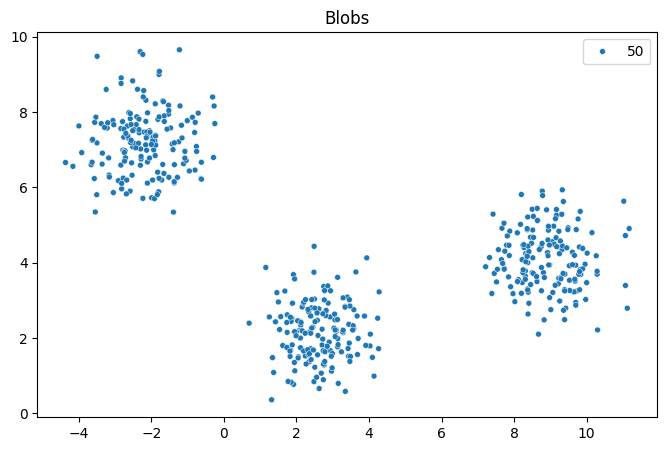

In [30]:
X, y = make_blobs(n_samples=500, centers=3, cluster_std=0.8,random_state=38)

# X nuqtalar, y- nuqtalarning qaysi clusterga kirishini bildiradi

plt.figure(figsize=(8,5))
sns.scatterplot(x=X[:,0], y=X[:,1],size=50)
plt.title('Blobs')
plt.show()

In [31]:
y[:10]

array([0, 2, 2, 0, 2, 2, 2, 0, 0, 1])

In [32]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=3, init='k-means++', n_init=15)

y_pred=kmeans.fit_predict(X)  # we train our points

**cluster_centers_** show the points of centeroids of each cluster

In [33]:
kmeans.cluster_centers_

array([[ 2.62297467,  2.16735909],
       [ 8.89252107,  4.08867564],
       [-2.19185718,  7.21786365]])

In [34]:
kmeans.labels_[:10] # nuqtalar qaysi clusterga tegishli ekanini bilish uchun .labels dan foydalanamiz

array([2, 0, 0, 2, 0, 0, 0, 2, 2, 1], dtype=int32)

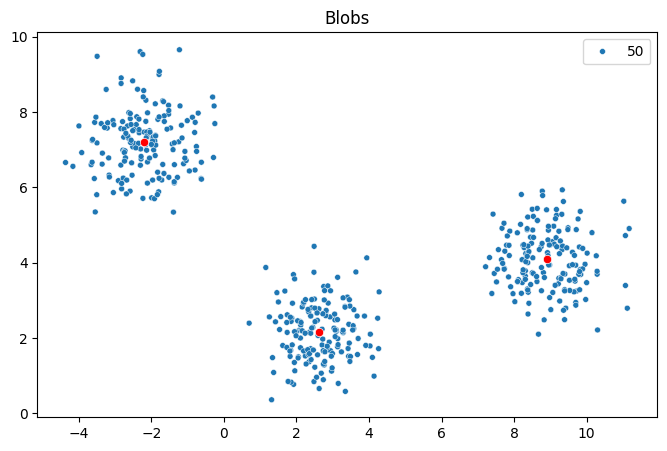

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X[:,0], y=X[:,1],size=50)
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],color='red',markers='X')
plt.title('Blobs')
plt.show()

**SSE** (Sum squared error)

In [36]:
kmeans.inertia_

631.2650972580979

In [39]:
sse=[]

for k in range(1,10):
  kmeans=KMeans(n_clusters=k,init='k-means++',n_init=15)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)

print(sse)

[13114.107896473766, 4210.872038988546, 631.2650972580979, 552.368974633175, 476.50728597219194, 419.6472142740471, 362.9835304464425, 311.5304406009821, 271.11634829985286]


ploting the elbow method

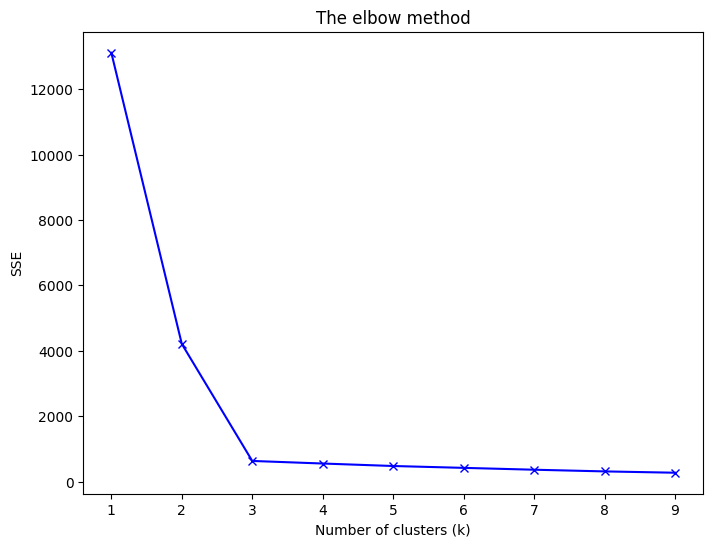

In [46]:
plt.figure(figsize=(8,6))
plt.plot(range(1,10),sse, marker='x', c='blue')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('The elbow method')
plt.show()